<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/XGBClassifier_SMOTE_grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
sample_df = pd.read_csv("/content/sample_df_train.csv")
sample_df.head()

,Unnamed: 0,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,112422,143813,"69_Dental caries on smooth surface,69_Dental c...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI...","25 OH VITAMIN D_34.09355501418554,A BASO #_0.0...",69.0,120.0,7.0,86.0,18.0,93.482373,1
1,37897,48430,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","A/G RATIO_1.0,A1c_8.236032038989142,ACTIVATED ...",63.0,89.0,9.0,95.0,21.0,99.936185,0
2,17169,21949,85_Problem related to unspecified psychosocial...,"84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...",ABSOLUTE BASOPHIL COUNT (AUTO)_0.0287499219743...,75.0,154.0,0.0,78.0,16.0,99.815148,1
3,71014,90695,74_Type 2 diabetes mellitus with neurological ...,"71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC...","ALT_10.0,APPEARANCE_CLEAR,AST_16.0,BASO%_0.800...",79.0,112.0,1.0,1.0,1.0,1.000000,1
4,108915,139292,"93_Sleep apnea,93_Presence of cardiac pacemake...","92_INFLUENZA, HIGH DOSE SEASONAL","ABSOLUTE BASOPHIL COUNT_0.019025756232656503,A...",79.0,134.0,0.0,61.0,16.0,98.868134,1


In [53]:
sample_df.drop('Unnamed: 0', axis = 1, inplace = True)
sample_df

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,143813,"69_Dental caries on smooth surface,69_Dental c...","68_TD (ADULT), 2 LF TETANUS TOXOID, PRESERVATI...","25 OH VITAMIN D_34.09355501418554,A BASO #_0.0...",69.0,120.0,7.0,86.0,18.0,93.482373,1
1,48430,"76_Low back pain,76_Cervicalgia,76_Other stres...","75_COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/...","A/G RATIO_1.0,A1c_8.236032038989142,ACTIVATED ...",63.0,89.0,9.0,95.0,21.0,99.936185,0
2,21949,85_Problem related to unspecified psychosocial...,"84_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...",ABSOLUTE BASOPHIL COUNT (AUTO)_0.0287499219743...,75.0,154.0,0.0,78.0,16.0,99.815148,1
3,90695,74_Type 2 diabetes mellitus with neurological ...,"71_FLU,3 YRS (HISTORICAL),71_INFLUENZA, UNSPEC...","ALT_10.0,APPEARANCE_CLEAR,AST_16.0,BASO%_0.800...",79.0,112.0,1.0,1.0,1.0,1.000000,1
4,139292,"93_Sleep apnea,93_Presence of cardiac pacemake...","92_INFLUENZA, HIGH DOSE SEASONAL","ABSOLUTE BASOPHIL COUNT_0.019025756232656503,A...",79.0,134.0,0.0,61.0,16.0,98.868134,1
...,...,...,...,...,...,...,...,...,...,...,...
14995,65643,"78_Edema, unspecified,78_Hereditary and idiopa...","78_INFLUENZA, UNSPECIFIED FORMULATION",".HDL_44.0,.INR_2.1637056000402657,.PT_27.49114...",71.0,119.0,0.0,78.0,14.0,101.000000,1
14996,112290,"85_Brief psychotic disorder,85_Dehydration,85_...","85_INFLUENZA, UNSPECIFIED FORMULATION","ALT(SGPT)_20.0,Absolute retics_44582.0,Activat...",67.0,133.0,99.0,112.0,28.0,101.717442,1
14997,129527,65_Asphyxia and hypoxemia,"59_INFLUENZA, UNSPECIFIED FORMULATION","(Censored)_BROWN,(Censored)_5.0,(Censored)_NEG...",67.0,139.0,2.0,108.0,20.0,94.011342,1
14998,50242,"85_Streptococcal infection, unspecified site,8...",85_PNEUMOCOCCAL CONJUGATE PCV 13,"ALBUMIN_4.294473933172667,ALKALINE PHOSPHATASE...",51.0,105.0,0.0,61.0,20.0,97.000000,1


In [54]:
!pip install gensim

In [55]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
sample_df['Condition_code_icd10_subcategory'] = sample_df['Condition_code_icd10_subcategory'].apply(nltk.word_tokenize)
sample_df['immunization'] = sample_df['immunization'].apply(nltk.word_tokenize)
sample_df['Lab_test_description_Result'] = sample_df['Lab_test_description_Result'].apply(nltk.word_tokenize)

In [57]:
sentences = sample_df['Condition_code_icd10_subcategory'] + sample_df['immunization'] + sample_df['Lab_test_description_Result']
model = Word2Vec(sentences, min_count=1)

In [58]:
import numpy as np

In [59]:
def text_to_vector(text):
  vec = []
  for word in text:
    if word in model.wv:
      vec.append(model.wv[word])
  return np.mean(vec, axis = 0) if vec else np.zeros(model.vector_size)

sample_df['condition_vector'] = sample_df['Condition_code_icd10_subcategory'].apply(text_to_vector)
sample_df['immunization_vector'] = sample_df['immunization'].apply(text_to_vector)
sample_df['Lab_vector'] = sample_df['Lab_test_description_Result'].apply(text_to_vector)


sample_df['condition_vector'] = sample_df['condition_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)
sample_df['immunization_vector'] = sample_df['immunization_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)
sample_df['Lab_vector'] = sample_df['Lab_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)

In [60]:
sample_df

,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,143813,"[69_Dental, caries, on, smooth, surface,69_Den...","[68_TD, (, ADULT, ), ,, 2, LF, TETANUS, TOXOID...","[25, OH, VITAMIN, D_34.09355501418554, ,, A, B...",69.0,120.0,7.0,86.0,18.0,93.482373,1,1.426725,3.810240,3.820269
1,48430,"[76_Low, back, pain,76_Cervicalgia,76_Other, s...","[75_COVID-19, (, PFIZER, ), ,, MRNA, ,, LNP-S,...","[A/G, RATIO_1.0, ,, A1c_8.236032038989142, ,, ...",63.0,89.0,9.0,95.0,21.0,99.936185,0,1.387941,4.963586,3.657513
2,21949,"[85_Problem, related, to, unspecified, psychos...","[84_INFLUENZA, ,, INJECTABLE, ,, QUADRIVALENT,...","[ABSOLUTE, BASOPHIL, COUNT, (, AUTO, ), _0.028...",75.0,154.0,0.0,78.0,16.0,99.815148,1,4.270432,4.295736,3.836972
3,90695,"[74_Type, 2, diabetes, mellitus, with, neurolo...","[71_FLU,3, YRS, (, HISTORICAL, ), ,71_INFLUENZ...","[ALT_10.0, ,, APPEARANCE_CLEAR, ,, AST_16.0, ,...",79.0,112.0,1.0,1.0,1.0,1.000000,1,3.571239,6.219761,3.268944
4,139292,"[93_Sleep, apnea,93_Presence, of, cardiac, pac...","[92_INFLUENZA, ,, HIGH, DOSE, SEASONAL]","[ABSOLUTE, BASOPHIL, COUNT_0.01902575623265650...",79.0,134.0,0.0,61.0,16.0,98.868134,1,3.675242,4.455320,3.001162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,65643,"[78_Edema, ,, unspecified,78_Hereditary, and, ...","[78_INFLUENZA, ,, UNSPECIFIED, FORMULATION]","[.HDL_44.0, ,, .INR_2.1637056000402657, ,, .PT...",71.0,119.0,0.0,78.0,14.0,101.000000,1,3.577964,5.418982,3.595909
14996,112290,"[85_Brief, psychotic, disorder,85_Dehydration,...","[85_INFLUENZA, ,, UNSPECIFIED, FORMULATION]","[ALT, (, SGPT, ), _20.0, ,, Absolute, retics_4...",67.0,133.0,99.0,112.0,28.0,101.717442,1,3.076007,5.429249,2.875493
14997,129527,"[65_Asphyxia, and, hypoxemia]","[59_INFLUENZA, ,, UNSPECIFIED, FORMULATION]","[(, Censored, ), _BROWN, ,, (, Censored, ), _5...",67.0,139.0,2.0,108.0,20.0,94.011342,1,3.592988,5.189059,3.094725
14998,50242,"[85_Streptococcal, infection, ,, unspecified, ...","[85_PNEUMOCOCCAL, CONJUGATE, PCV, 13]","[ALBUMIN_4.294473933172667, ,, ALKALINE, PHOSP...",51.0,105.0,0.0,61.0,20.0,97.000000,1,3.143645,2.678476,3.329941


In [61]:
sample_df['death'].value_counts()

1    10958
0     4042
Name: death, dtype: int64

In [62]:
sample_df.drop(['immunization','Condition_code_icd10_subcategory','Lab_test_description_Result'], axis =1, inplace = True)
sample_df.head()

,Internalpatientid,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,143813,69.0,120.0,7.0,86.0,18.0,93.482373,1,1.426725,3.810240,3.820269
1,48430,63.0,89.0,9.0,95.0,21.0,99.936185,0,1.387941,4.963586,3.657513
2,21949,75.0,154.0,0.0,78.0,16.0,99.815148,1,4.270432,4.295736,3.836972
3,90695,79.0,112.0,1.0,1.0,1.0,1.000000,1,3.571239,6.219761,3.268944
4,139292,79.0,134.0,0.0,61.0,16.0,98.868134,1,3.675242,4.455320,3.001162


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = ['Diastolic bp','Systolic bp','Pain','Pulse','Respiratory rate','Temperature']

sample_df[columns_to_scale] = scaler.fit_transform(sample_df[columns_to_scale])

In [64]:
sample_df

,Internalpatientid,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,143813,0.030118,-0.160737,0.103175,0.501411,-0.008165,-0.115677,1,1.426725,3.810240,3.820269
1,48430,-0.398016,-1.427301,0.213538,0.940136,-0.008165,0.304031,0,1.387941,4.963586,3.657513
2,21949,0.458252,1.228397,-0.283096,0.111433,-0.008165,0.296160,1,4.270432,4.295736,3.836972
3,90695,0.743674,-0.487592,-0.227915,-3.642105,-0.008165,-6.130038,1,3.571239,6.219761,3.268944
4,139292,0.743674,0.411259,-0.283096,-0.717270,-0.008165,0.234573,1,3.675242,4.455320,3.001162
...,...,...,...,...,...,...,...,...,...,...,...
14995,65643,0.172829,-0.201594,-0.283096,0.111433,-0.008165,0.373214,1,3.577964,5.418982,3.595909
14996,112290,-0.112593,0.370402,5.179882,1.768839,-0.008165,0.419871,1,3.076007,5.429249,2.875493
14997,129527,-0.112593,0.615544,-0.172733,1.573850,-0.008165,-0.081276,1,3.592988,5.189059,3.094725
14998,50242,-1.254283,-0.773591,-0.283096,-0.717270,-0.008165,0.113083,1,3.143645,2.678476,3.329941


In [65]:
sample_df.drop('Internalpatientid', axis = 1, inplace = True)
sample_df

,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,0.030118,-0.160737,0.103175,0.501411,-0.008165,-0.115677,1,1.426725,3.810240,3.820269
1,-0.398016,-1.427301,0.213538,0.940136,-0.008165,0.304031,0,1.387941,4.963586,3.657513
2,0.458252,1.228397,-0.283096,0.111433,-0.008165,0.296160,1,4.270432,4.295736,3.836972
3,0.743674,-0.487592,-0.227915,-3.642105,-0.008165,-6.130038,1,3.571239,6.219761,3.268944
4,0.743674,0.411259,-0.283096,-0.717270,-0.008165,0.234573,1,3.675242,4.455320,3.001162
...,...,...,...,...,...,...,...,...,...,...
14995,0.172829,-0.201594,-0.283096,0.111433,-0.008165,0.373214,1,3.577964,5.418982,3.595909
14996,-0.112593,0.370402,5.179882,1.768839,-0.008165,0.419871,1,3.076007,5.429249,2.875493
14997,-0.112593,0.615544,-0.172733,1.573850,-0.008165,-0.081276,1,3.592988,5.189059,3.094725
14998,-1.254283,-0.773591,-0.283096,-0.717270,-0.008165,0.113083,1,3.143645,2.678476,3.329941


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight

In [67]:
# Separate features (X) and target variable (y)
X = sample_df.drop('death', axis=1)
y = sample_df['death']

In [68]:

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12000, 9)
y_train shape: (12000,)
X_test shape: (3000, 9)
y_test shape: (3000,)


In [69]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

param_grid ={
    'n_estimators':[100,200,300],
    'max_depth': [3,5,7],
    'learning_rate': [0.1,0.01,0.001]
}

xgb_classifier = XGBClassifier()

grid_search = GridSearchCV(xgb_classifier, param_grid, cv = 15, scoring = 'f1',verbose = 1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)





# Make predictions on test data

y_pred = best_model.predict(X_test)


Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [70]:
!pip install imbalanced-learn

In [71]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8443333333333334


In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       820
           1       0.89      0.90      0.89      2180

    accuracy                           0.84      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.84      0.84      0.84      3000



In [74]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[ 570  250]
 [ 217 1963]]


In [75]:
df_test = pd.read_csv('/content/whole_df_test.csv')
df_test

,Unnamed: 0,Internalpatientid,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,0,6,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","(Censored)_6.0,25-OH VITAMIN D_32.607378522655...",67.0,126.0,0.0,51.0,16.0,97.030389,1.0
1,1,7,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","A1C%*ia_8.99292444222623,ABS BASOPHIL_0.0,ABS ...",72.0,116.0,0.0,67.0,19.0,97.567325,0.0
2,2,9,52_Hypertensive heart disease with heart failu...,positive/negative,"A/G Ratio_0.6014801244136432,ADO2_45.330294635...",52.0,105.0,0.0,91.0,21.0,98.600910,1.0
3,3,12,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","ALBUMIN_2.796406688808573,ALBUMIN (blood)_3.60...",67.0,104.0,3.0,64.0,24.0,97.693046,1.0
4,4,17,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","ALBUMIN_2.4680068370117434,ALK PHOS - OLD(H)_5...",61.0,86.0,0.0,63.0,25.0,101.122904,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34808,34808,64432,positive/negative,positive/negative,"% IRON SATURATION_14.961508194877588,A-aDO2_ca...",50.0,132.0,0.0,41.0,25.0,99.396176,1.0
34809,34809,106205,positive/negative,positive/negative,"(1-3)-B-D-Glucan_112.0,ABG,BASE EXCESS_4.98064...",69.0,132.0,0.0,114.0,23.0,102.395419,1.0
34810,34810,138129,positive/negative,positive/negative,"ADDITIONAL BLOOD FILM_DONE,ALBUMIN_2.068015595...",64.0,84.0,97.0,94.0,29.0,93.109955,1.0
34811,34811,145401,positive/negative,positive/negative,"% IMMATURE GRANS (WAM)_0.3098076237808385,%NRB...",46.0,82.0,102.0,77.0,20.0,100.525257,1.0


In [76]:
df_test.drop(['Unnamed: 0','Internalpatientid'], axis = 1, inplace = True)
df_test.head()

,Condition_code_icd10_subcategory,immunization,Lab_test_description_Result,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death
0,88_Other specified counseling,"88_FLU,3 YRS (HISTORICAL)","(Censored)_6.0,25-OH VITAMIN D_32.607378522655...",67.0,126.0,0.0,51.0,16.0,97.030389,1.0
1,74_Dental caries on smooth surface,"73_INFLUENZA, INJECTABLE, QUADRIVALENT, PRESER...","A1C%*ia_8.99292444222623,ABS BASOPHIL_0.0,ABS ...",72.0,116.0,0.0,67.0,19.0,97.567325,0.0
2,52_Hypertensive heart disease with heart failu...,positive/negative,"A/G Ratio_0.6014801244136432,ADO2_45.330294635...",52.0,105.0,0.0,91.0,21.0,98.600910,1.0
3,"74_Polyosteoarthritis, unspecified ; Osteoarth...","71_FLU,3 YRS (HISTORICAL)","ALBUMIN_2.796406688808573,ALBUMIN (blood)_3.60...",67.0,104.0,3.0,64.0,24.0,97.693046,1.0
4,"82_Encounter for other specified aftercare,82_...","82_INFLUENZA (HISTORICAL),82_INFLUENZA, WHOLE","ALBUMIN_2.4680068370117434,ALK PHOS - OLD(H)_5...",61.0,86.0,0.0,63.0,25.0,101.122904,1.0


In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['Diastolic bp','Systolic bp','Pain','Pulse','Respiratory rate','Temperature']

df_test[columns_to_scale] = scaler.fit_transform(df_test[columns_to_scale])

In [78]:
df_test['Condition_code_icd10_subcategory'] = df_test['Condition_code_icd10_subcategory'].apply(nltk.word_tokenize)
df_test['immunization'] = df_test['immunization'].apply(nltk.word_tokenize)
df_test['Lab_test_description_Result'] = df_test['Lab_test_description_Result'].apply(nltk.word_tokenize)

In [79]:
sentences = df_test['Condition_code_icd10_subcategory'] + df_test['immunization'] + df_test['Lab_test_description_Result']
model = Word2Vec(sentences, min_count=1)


In [80]:
def text_to_vector(text):
  vec = []
  for word in text:
    if word in model.wv:
      vec.append(model.wv[word])
  return np.mean(vec, axis = 0) if vec else np.zeros(model.vector_size)

df_test['condition_vector'] = df_test['Condition_code_icd10_subcategory'].apply(text_to_vector)
df_test['immunization_vector'] = df_test['immunization'].apply(text_to_vector)
df_test['Lab_vector'] = df_test['Lab_test_description_Result'].apply(text_to_vector)


df_test['condition_vector'] = df_test['condition_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)
df_test['immunization_vector'] = df_test['immunization_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)
df_test['Lab_vector'] = df_test['Lab_vector'].apply(lambda x: np.max(x) if isinstance (x, np.ndarray) else 0)

In [81]:
df_test.drop(['immunization','Condition_code_icd10_subcategory','Lab_test_description_Result'], axis =1, inplace = True)
df_test.head()

,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,-0.108475,0.088982,-0.283788,-1.215512,-0.496499,0.112373,1.0,4.837852,5.858328,3.105974
1,0.250452,-0.319446,-0.283788,-0.427170,0.115570,0.148022,0.0,1.816899,4.157315,3.825701
2,-1.185255,-0.768716,-0.283788,0.755342,0.523616,0.216646,1.0,4.675405,7.810008,2.973729
3,-0.108475,-0.809559,-0.121343,-0.574984,1.135686,0.156369,1.0,3.801671,5.808496,3.162222
4,-0.539187,-1.544729,-0.283788,-0.624256,1.339709,0.384091,1.0,3.867157,5.446950,2.876059


In [82]:
#df_test.drop(['immunization','Condition_code_icd10_subcategory','Lab_test_description_Result'], axis =1, inplace = True)
df_test.head()

,Diastolic bp,Systolic bp,Pain,Pulse,Respiratory rate,Temperature,death,condition_vector,immunization_vector,Lab_vector
0,-0.108475,0.088982,-0.283788,-1.215512,-0.496499,0.112373,1.0,4.837852,5.858328,3.105974
1,0.250452,-0.319446,-0.283788,-0.427170,0.115570,0.148022,0.0,1.816899,4.157315,3.825701
2,-1.185255,-0.768716,-0.283788,0.755342,0.523616,0.216646,1.0,4.675405,7.810008,2.973729
3,-0.108475,-0.809559,-0.121343,-0.574984,1.135686,0.156369,1.0,3.801671,5.808496,3.162222
4,-0.539187,-1.544729,-0.283788,-0.624256,1.339709,0.384091,1.0,3.867157,5.446950,2.876059


In [83]:
X_test = df_test.drop('death', axis = 1)
y_test = df_test['death']

In [84]:
predictions = best_model.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on the test data:",accuracy)

Accuracy on the test data: 0.7411311866256858


In [86]:
confusion = confusion_matrix(y_test, predictions)
print("Confusion MAtrix:")
print(confusion)

Confusion MAtrix:
[[ 4798  4687]
 [ 4325 21003]]


In [87]:
classification_rep = classification_report(y_test, predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.51      0.52      9485
         1.0       0.82      0.83      0.82     25328

    accuracy                           0.74     34813
   macro avg       0.67      0.67      0.67     34813
weighted avg       0.74      0.74      0.74     34813



In [88]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = best_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [89]:
print("AUC:", auc)

AUC: 0.6675458553103264


In [90]:
import matplotlib.pyplot as plt


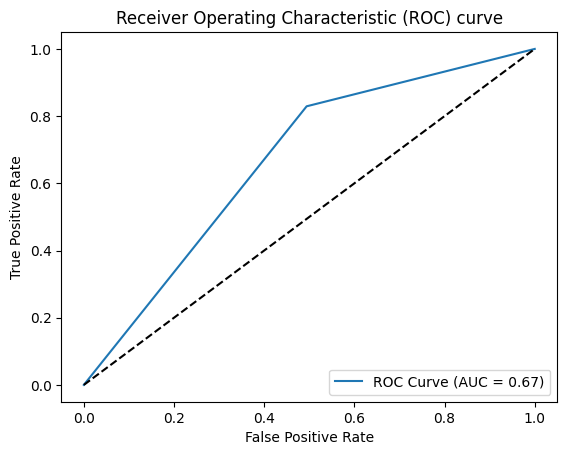

In [91]:
plt.plot(fpr, tpr, label = 'ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc='lower right')
plt.show()

In [92]:
from sklearn.metrics import matthews_corrcoef

# Calculate the Matthew Correaltion Coeffient
mcc = matthews_corrcoef(y_test, predictions)
print(("Matthew Correlation Coefficient(MCC):", mcc))

('Matthew Correlation Coefficient(MCC):', 0.33925941693408446)
